## FEMA (Disaster declarations) & Redfin

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Optional: For climate risk modeling
from sklearn.preprocessing import MinMaxScaler

# For LLM Agents (will be used later)
!pip install langchain openai

print("✅ Libraries loaded successfully.")

✅ Libraries loaded successfully.


In [2]:
# 📄 Load Redfin Real Estate Data
redfin_df = pd.read_csv("state_market_tracker.tsv", sep='\t')
print(f" Redfin dataset loaded with {redfin_df.shape[0]} rows and {redfin_df.shape[1]} columns.")

# 📄 Load FEMA Disaster Declarations
fema_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
fema_params = {'$orderby': 'declarationDate desc', '$top': 10000, '$format': 'json'}

fema_response = requests.get(fema_url, params=fema_params)
fema_data = fema_response.json()
fema_df = pd.DataFrame(fema_data['DisasterDeclarationsSummaries'])
print(f"FEMA dataset loaded with {fema_df.shape[0]} rows.")

# ✅ Show a sample of each
display(redfin_df.head())
display(fema_df.head())


 Redfin dataset loaded with 38560 rows and 58 columns.
FEMA dataset loaded with 10000 rows.


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2024-11-01,2024-11-30,30,state,4,41,f,Maine,NaN,Maine,...,-0.065006,0.202816,-0.076620,-0.053345,0.358067,-0.045096,-0.040771,Northeast Region,NaN,2025-01-13 14:16:48
1,2020-06-01,2020-06-30,30,state,4,42,f,Virginia,NaN,Virginia,...,0.038534,0.096800,-0.006761,-0.054530,0.374999,0.027568,0.122037,South Region,NaN,2025-01-13 14:16:48
2,2018-11-01,2018-11-30,30,state,4,43,f,Maryland,NaN,Maryland,...,-0.007853,0.280866,-0.144404,0.014538,0.270132,-0.014779,0.124608,South Region,NaN,2025-01-13 14:16:48
3,2017-11-01,2017-11-30,30,state,4,25,f,Hawaii,NaN,Hawaii,...,-0.020833,0.064103,-0.026807,0.008028,0.280702,0.280702,0.090442,West Region,NaN,2025-01-13 14:16:48
4,2013-01-01,2013-01-31,30,state,4,22,f,Ohio,NaN,Ohio,...,0.250000,NaN,NaN,NaN,0.000000,0.000000,0.000000,Midwest Region,NaN,2025-01-13 14:16:48


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5580-NC,5580,NC,FM,2025-04-20T00:00:00.000Z,2025,Fire,SAM DAVIS ROAD FIRE,False,False,...,99173,Swain (County),25056,None,2025042001,4,R,2025-04-21T14:01:26.300Z,9cd74d5ed9c6b788f0820dc7a5a301d2a8c4cbd7,ef8a6cb4-564c-4215-aa71-6ff080ab4ec4
1,FM-5579-NM,5579,NM,FM,2025-04-18T00:00:00.000Z,2025,Fire,RIO GRANDE FIRE,False,False,...,99061,Valencia (County),25054,None,2025041801,6,R,2025-04-18T20:21:19.951Z,20705923751a53b0cac0997c345b1bd1d257528c,c848e275-887b-4d89-a05f-ff2fd864a23e
2,EM-3627-AR,3627,AR,EM,2025-04-05T00:00:00.000Z,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,...,99083,Logan (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,571c30d043a1d397a27c178461489e05620b8e80,02a6d3eb-9346-467b-8149-a927cdca147b
3,EM-3627-AR,3627,AR,EM,2025-04-05T00:00:00.000Z,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,...,99087,Madison (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,357a870985e5918df5f60f9947654fdb3620bf4d,52488ab6-07c2-48dc-8b95-8864f59fe2c4
4,EM-3627-AR,3627,AR,EM,2025-04-05T00:00:00.000Z,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,...,99131,Sebastian (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,ca96e327106e1685783f417e4eb79b58569f6067,e5e7ac66-437f-4d56-837a-5ccc15cb364c


- Loads real estate market data from Redfin.
- Pulls climate disaster data from FEMA's API.
- Displays the top rows for a visual preview.

In [30]:


# Check for missing values
print("\nMissing Values in Market Data:")
missing_values = redfin_df.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values


Missing Values in Market Data:
city                              38560
median_list_price                   104
median_list_price_mom               167
median_list_price_yoy               185
median_ppsf                         114
median_ppsf_mom                      15
median_ppsf_yoy                      13
median_list_ppsf                    104
median_list_ppsf_mom                167
median_list_ppsf_yoy                185
pending_sales                        97
pending_sales_mom                   115
pending_sales_yoy                   130
new_listings                        104
new_listings_mom                    167
new_listings_yoy                    185
inventory                            83
inventory_mom                        88
inventory_yoy                        97
months_of_supply                     83
months_of_supply_mom                 88
months_of_supply_yoy                 97
median_dom                           23
median_dom_mom                       29
median_d

In [33]:
# Explore time range
if 'period_begin' in redfin_df.columns:
    redfin_df['period_begin'] = pd.to_datetime(redfin_df['period_begin'])
    print("\nTime Range of Market Data:")
    print(f"Start: {redfin_df['period_begin'].min()}")
    print(f"End: {redfin_df['period_begin'].max()}")


Time Range of Market Data:
Start: 2012-01-01 00:00:00
End: 2024-12-01 00:00:00


In [35]:
# Explore geographical coverage
if 'state' in redfin_df.columns:
    print("\nState Coverage in Market Data:")
    print(redfin_df['state'].value_counts())


State Coverage in Market Data:
state
Massachusetts     780
Utah              780
Texas             780
Oklahoma          780
Virginia          780
Minnesota         780
Illinois          780
New York          780
North Carolina    780
New Jersey        780
Oregon            780
Colorado          780
Arizona           780
South Carolina    780
California        780
Florida           780
Missouri          780
Indiana           780
Nebraska          780
Columbia          780
Maryland          780
Ohio              780
New Hampshire     780
Washington        780
Georgia           780
Pennsylvania      780
Nevada            780
Idaho             780
Kansas            780
Kentucky          780
Louisiana         779
Wisconsin         778
Delaware          778
Mississippi       778
Tennessee         775
South Dakota      774
Iowa              770
Vermont           765
Arkansas          764
Alabama           762
New Mexico        743
Hawaii            741
West Virginia     730
Montana         

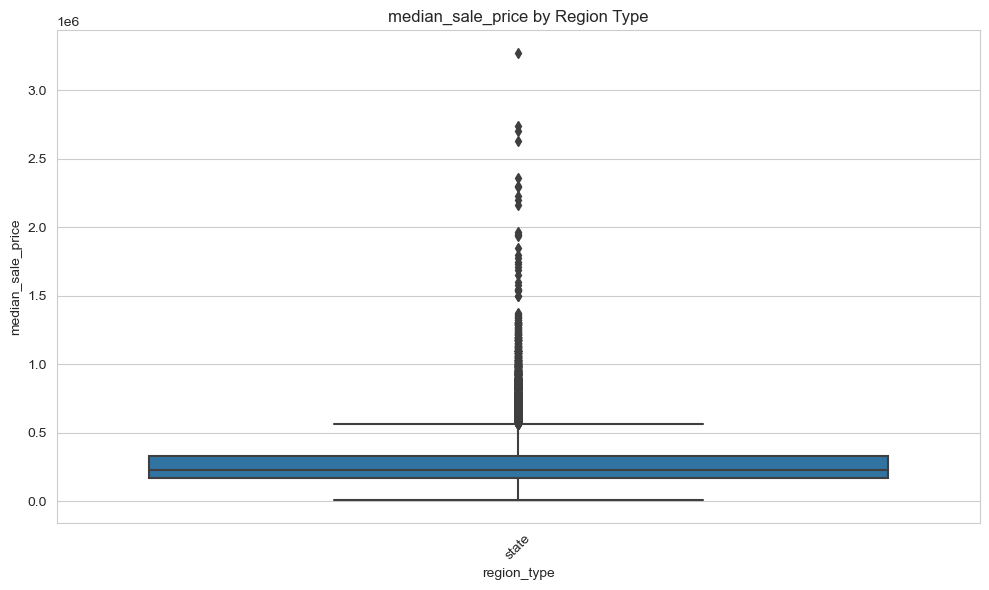

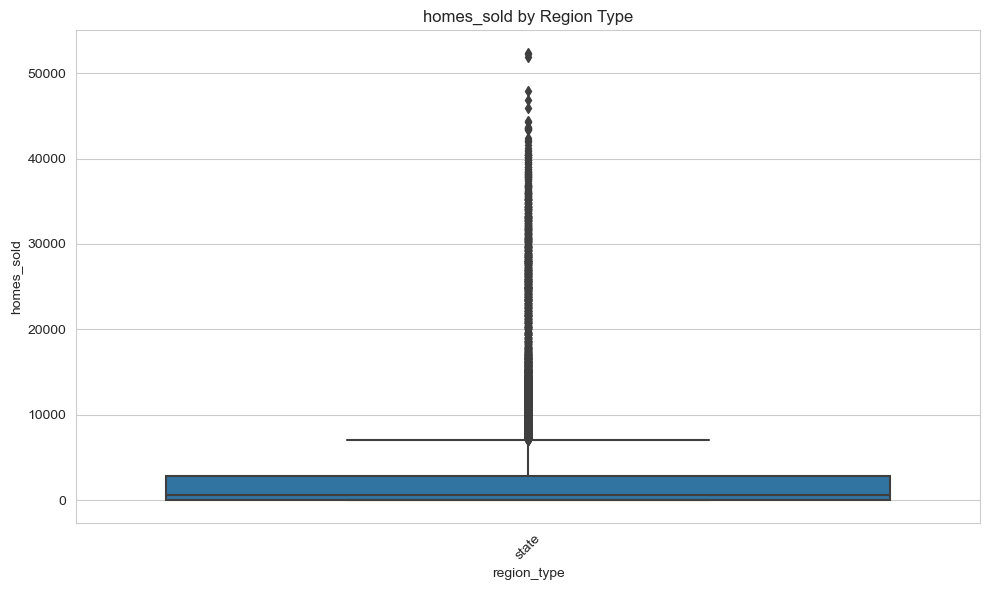

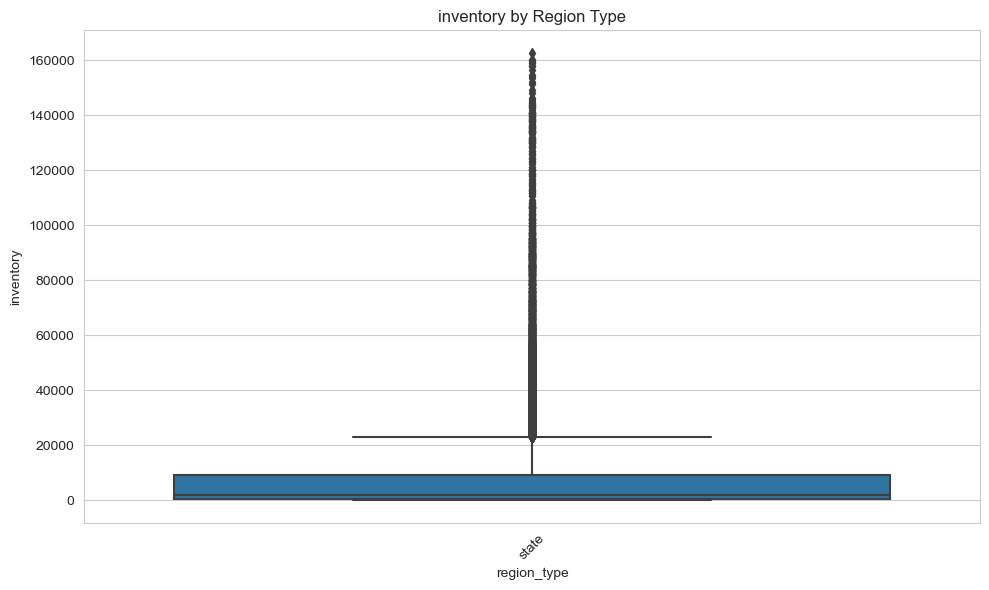

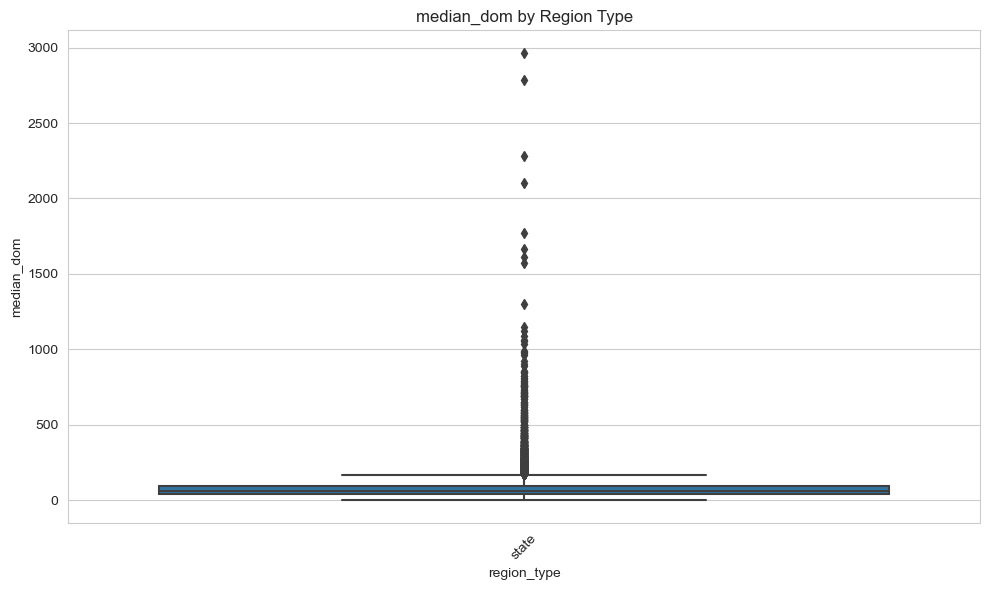

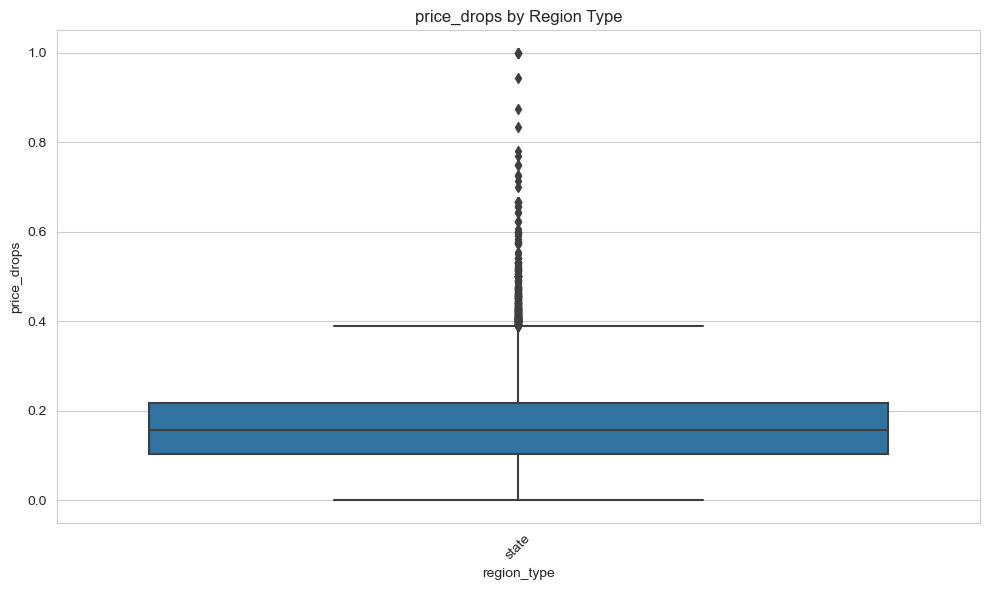

In [36]:
# Explore key market indicators
key_indicators = ['median_sale_price', 'homes_sold', 'inventory', 
                  'median_dom', 'price_drops']
                  
for indicator in key_indicators:
    if indicator in redfin_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=redfin_df, x='region_type', y=indicator)
        plt.title(f'{indicator} by Region Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [37]:
# Display basic information
print("FEMA Disaster Data Shape:", fema_df.shape)
print("\nFEMA Data Types:")
print(fema_df.dtypes)
print("\nFEMA Data Sample:")
display(fema_df.head())

FEMA Disaster Data Shape: (10000, 29)

FEMA Data Types:
femaDeclarationString                    object
disasterNumber                            int64
state                                    object
declarationType                          object
declarationDate             datetime64[ns, UTC]
fyDeclared                                int64
incidentType                             object
declarationTitle                         object
ihProgramDeclared                          bool
iaProgramDeclared                          bool
paProgramDeclared                          bool
hmProgramDeclared                          bool
incidentBeginDate           datetime64[ns, UTC]
incidentEndDate             datetime64[ns, UTC]
disasterCloseoutDate                     object
tribalRequest                              bool
fipsStateCode                            object
fipsCountyCode                           object
placeCode                                object
designatedArea                  

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id,year
0,FM-5580-NC,5580,NC,FM,2025-04-20 00:00:00+00:00,2025,Fire,SAM DAVIS ROAD FIRE,False,False,True,True,2025-04-18 00:00:00+00:00,NaT,None,False,37,173,99173,Swain (County),25056,None,2025042001,4,R,2025-04-21T14:01:26.300Z,9cd74d5ed9c6b788f0820dc7a5a301d2a8c4cbd7,ef8a6cb4-564c-4215-aa71-6ff080ab4ec4,2025
1,FM-5579-NM,5579,NM,FM,2025-04-18 00:00:00+00:00,2025,Fire,RIO GRANDE FIRE,False,False,True,True,2025-04-17 00:00:00+00:00,NaT,None,False,35,061,99061,Valencia (County),25054,None,2025041801,6,R,2025-04-18T20:21:19.951Z,20705923751a53b0cac0997c345b1bd1d257528c,c848e275-887b-4d89-a05f-ff2fd864a23e,2025
2,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,083,99083,Logan (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,571c30d043a1d397a27c178461489e05620b8e80,02a6d3eb-9346-467b-8149-a927cdca147b,2025
3,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,087,99087,Madison (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,357a870985e5918df5f60f9947654fdb3620bf4d,52488ab6-07c2-48dc-8b95-8864f59fe2c4,2025
4,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,131,99131,Sebastian (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,ca96e327106e1685783f417e4eb79b58569f6067,e5e7ac66-437f-4d56-837a-5ccc15cb364c,2025


In [38]:
# Check for missing values
print("\nMissing Values in FEMA Data:")
print(fema_df.isnull().sum())


Missing Values in FEMA Data:
femaDeclarationString          0
disasterNumber                 0
state                          0
declarationType                0
declarationDate                0
fyDeclared                     0
incidentType                   0
declarationTitle               0
ihProgramDeclared              0
iaProgramDeclared              0
paProgramDeclared              0
hmProgramDeclared              0
incidentBeginDate              0
incidentEndDate              426
disasterCloseoutDate        7632
tribalRequest                  0
fipsStateCode                  0
fipsCountyCode                 0
placeCode                      0
designatedArea                 0
declarationRequestNumber       0
lastIAFilingDate            5988
incidentId                     0
region                         0
designatedIncidentTypes     5755
lastRefresh                    0
hash                           0
id                             0
year                           0
dtype: int64



Types of Disasters:
incidentType
Hurricane              2918
Severe Storm           2188
Biological             1158
Tropical Storm         1059
Severe Ice Storm        952
Flood                   741
Fire                    475
Tornado                 172
Coastal Storm           131
Winter Storm            117
Snowstorm                48
Other                    16
Mud/Landslide            13
Dam/Levee Break           7
Earthquake                3
Straight-Line Winds       2
Name: count, dtype: int64

Time Range of FEMA Data:
Start: 2020-01-20 00:00:00+00:00
End: 2025-04-18 00:00:00+00:00

State Coverage in FEMA Data:
state
LA    906
FL    833
TX    799
KY    716
NC    492
MS    482
PR    451
GA    414
OK    400
TN    325
Name: count, dtype: int64


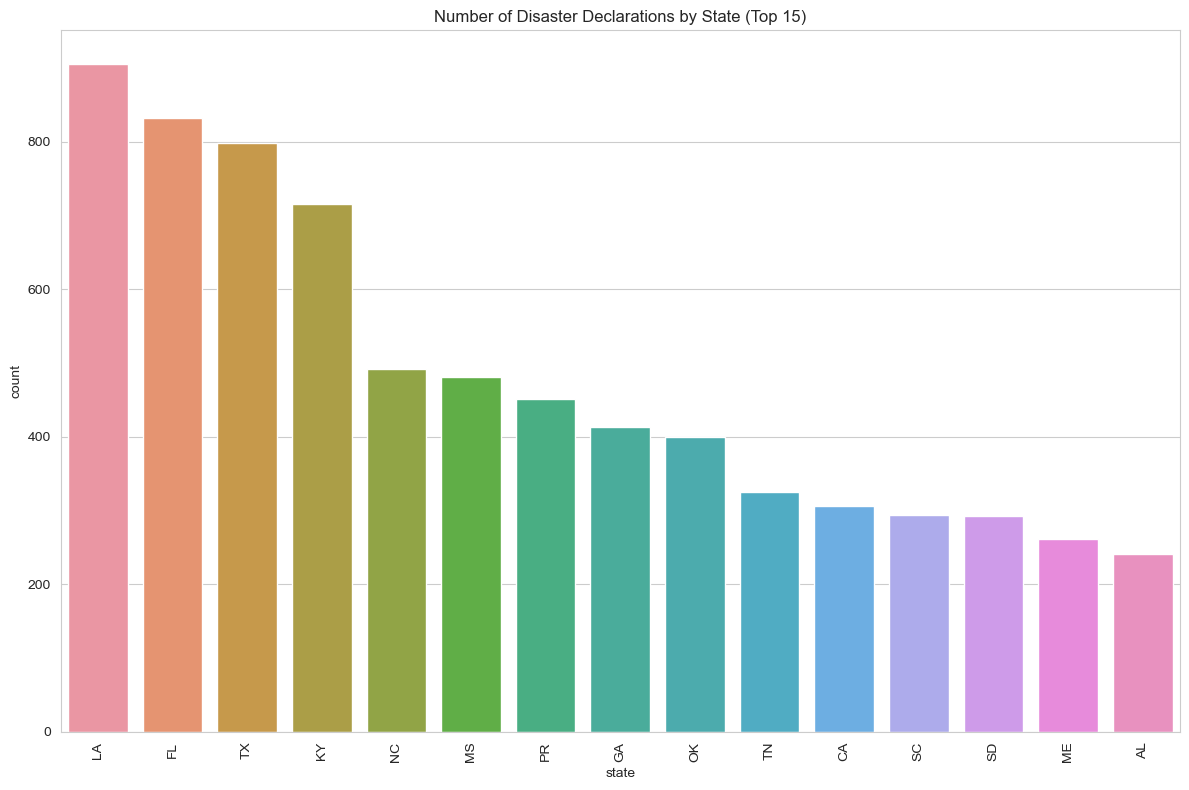

In [39]:
# Explore disaster types
if 'incidentType' in fema_df.columns:
    print("\nTypes of Disasters:")
    print(fema_df['incidentType'].value_counts())

# Explore time range
if 'incidentBeginDate' in fema_df.columns:
    fema_df['incidentBeginDate'] = pd.to_datetime(fema_df['incidentBeginDate'])
    print("\nTime Range of FEMA Data:")
    print(f"Start: {fema_df['incidentBeginDate'].min()}")
    print(f"End: {fema_df['incidentBeginDate'].max()}")

# Explore geographical coverage
if 'state' in fema_df.columns:
    print("\nState Coverage in FEMA Data:")
    print(fema_df['state'].value_counts().head(10))  # Top 10 states
    
    # Visualize disasters by state
    plt.figure(figsize=(12, 8))
    top_states = fema_df['state'].value_counts().head(15).index
    state_data = fema_df[fema_df['state'].isin(top_states)]
    
    sns.countplot(data=state_data, x='state', order=top_states)
    plt.title('Number of Disaster Declarations by State (Top 15)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

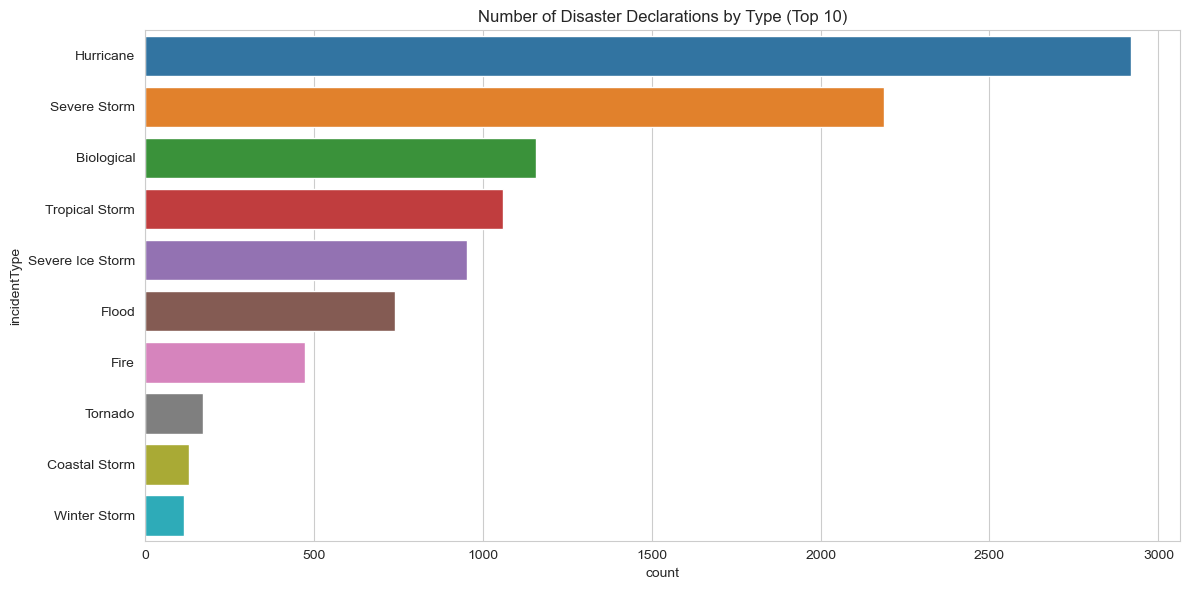

<Figure size 1200x600 with 0 Axes>

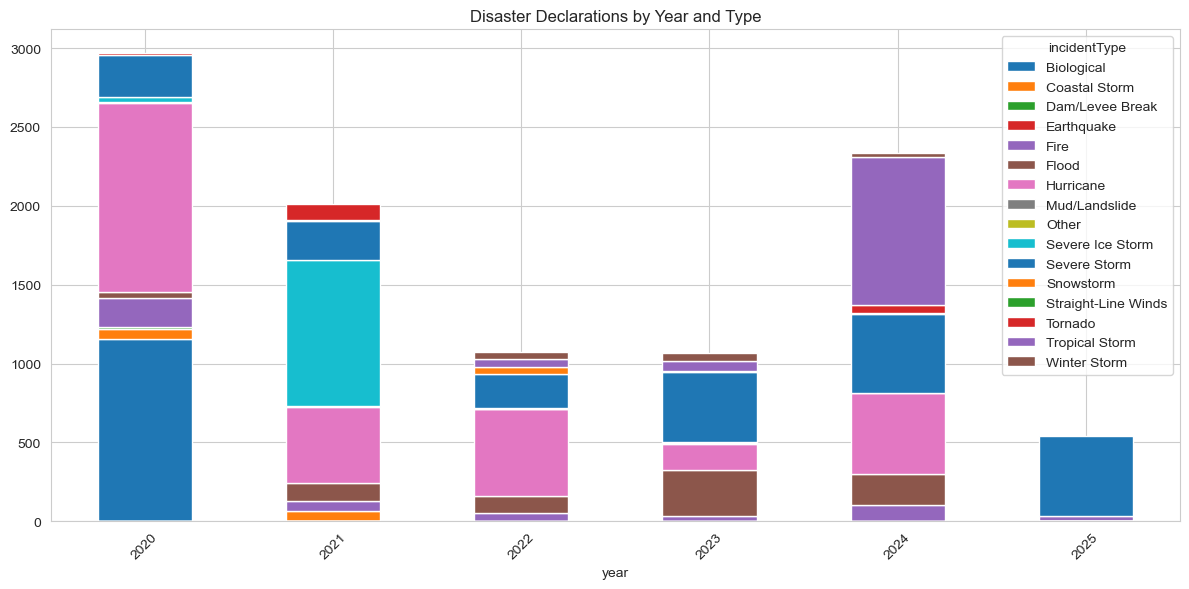

In [40]:
# Visualize disasters by type
if 'incidentType' in fema_df.columns:
    plt.figure(figsize=(12, 6))
    top_types = fema_df['incidentType'].value_counts().head(10).index
    sns.countplot(data=fema_df, y='incidentType', order=top_types)
    plt.title('Number of Disaster Declarations by Type (Top 10)')
    plt.tight_layout()
    plt.show()
    
    # Disasters by year if year column exists
    if 'year' in fema_df.columns:
        plt.figure(figsize=(12, 6))
        yearly_counts = fema_df.groupby(['year', 'incidentType']).size().unstack()
        yearly_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title('Disaster Declarations by Year and Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [47]:
# Function to clean and preprocess market data
def clean_market_data(df):
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Convert date columns to datetime
    date_columns = ['period_begin', 'period_end', 'last_updated']
    for col in date_columns:
        if col in df_clean.columns and df_clean[col].dtype != 'datetime64[ns]':
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
    
    # Extract year and month for easier aggregation
    if 'period_begin' in df_clean.columns:
        df_clean['year'] = df_clean['period_begin'].dt.year
        df_clean['month'] = df_clean['period_begin'].dt.month
    
    # Standardize state codes if needed
    if 'state_code' in df_clean.columns:
        df_clean['state_code'] = df_clean['state_code'].str.upper()
    
    # Handle missing values in key metrics
    # Strategy: For market data, often filling with medians or means is appropriate
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    
    # Print columns with most missing values
    missing_counts = df_clean[numeric_cols].isnull().sum()
    print("Columns with most missing values:")
    print(missing_counts[missing_counts > 0].sort_values(ascending=False).head())
    
    # For key metrics, fill missing values appropriately
    key_metrics = ['median_sale_price', 'homes_sold', 'inventory', 'median_dom', 'price_drops']
    for col in key_metrics:
        if col in df_clean.columns:
            # Fill with median by region and year if possible
            if df_clean[col].isnull().sum() > 0:
                print(f"Filling missing values in {col}")
                # Group by region and year for more accurate filling
                fill_values = df_clean.groupby(['region', 'year'])[col].transform('median')
                df_clean[col] = df_clean[col].fillna(fill_values)
                # Fall back to overall median for any remaining NAs
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # Check for and handle outliers in key metrics
    for col in key_metrics:
        if col in df_clean.columns:
            # Simple IQR-based outlier detection
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"Found {len(outliers)} outliers in {col}")
                # For market data, often capping is better than dropping
                df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
                print(f"Capped outliers in {col}")
    
    return df_clean

In [50]:
# Clean market data
market_clean = clean_market_data(redfin_df)

# Verify cleaning results
print("\nCleaned Market Data Sample:")
display(market_clean.head())

# Check for any remaining missing values in key columns
key_columns = ['median_sale_price', 'homes_sold', 'inventory', 
              'median_dom', 'price_drops', 'region', 'state']
print("\nMissing Values in Key Columns After Cleaning:")
missing = market_clean[key_columns].isnull().sum()
print(missing[missing > 0])

Columns with most missing values:
city                              38560
parent_metro_region_metro_code    38560
price_drops_yoy                   10370
price_drops_mom                    8667
price_drops                        8201
dtype: int64
Filling missing values in inventory
Filling missing values in median_dom
Filling missing values in price_drops
Found 2175 outliers in median_sale_price
Capped outliers in median_sale_price
Found 4467 outliers in homes_sold
Capped outliers in homes_sold
Found 4362 outliers in inventory
Capped outliers in inventory
Found 1373 outliers in median_dom
Capped outliers in median_dom
Found 430 outliers in price_drops
Capped outliers in price_drops

Cleaned Market Data Sample:


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year,month
0,2024-11-01,2024-11-30,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,402500,-0.029789,0.081431,395100.0,-0.052429,0.053751,251.0,-0.039117,0.072357,256.0,-0.033297,0.095935,1501,-0.125801,0.034459,1524.0,-0.206250,0.121413,1330.0,-0.351220,0.078670,4546.0,-0.095863,0.383024,3.0,0.1,0.7,43.0,3.0,13.0,0.981415,-0.001156,-0.013116,0.306462,0.007103,-0.065006,0.202816,-0.076620,-0.053345,0.358067,-0.045096,-0.040771,Northeast Region,NaN,2025-01-13 14:16:48,2024,11
1,2020-06-01,2020-06-30,30,state,4,42,f,Virginia,NaN,Virginia,VA,Single Family Residential,6,348300,0.019555,0.009276,328100.0,0.009550,0.091965,158.0,0.006747,0.015511,164.0,0.009004,0.073317,7096,0.245401,0.017535,12321.0,0.150098,0.185281,9998.0,0.090413,-0.047991,20971.0,-0.068701,-0.297266,2.0,-0.7,-0.9,49.0,5.0,4.0,0.990132,0.000836,0.003135,0.302528,-0.001363,0.038534,0.096800,-0.006761,-0.054530,0.374999,0.027568,0.122037,South Region,NaN,2025-01-13 14:16:48,2020,6
2,2018-11-01,2018-11-30,30,state,4,43,f,Maryland,NaN,Maryland,MD,Townhouse,13,226100,0.016573,0.037703,248900.0,-0.087727,0.018036,139.0,-0.010134,-0.019633,146.0,-0.060069,-0.026089,2065,-0.039088,-0.060937,2253.0,-0.119922,-0.067081,2128.0,-0.208039,-0.073171,5864.0,-0.039004,-0.007783,2.8,0.0,0.1,43.0,1.0,8.0,0.996570,0.004887,-0.000281,0.236804,-0.013080,-0.007853,0.280866,-0.144404,0.014538,0.270132,-0.014779,0.124608,South Region,NaN,2025-01-13 14:16:48,2018,11
3,2017-11-01,2017-11-30,30,state,4,25,f,Hawaii,NaN,Hawaii,HI,Townhouse,13,565300,-0.192445,0.095608,727700.0,0.244710,0.250023,431.0,-0.033145,0.195455,563.0,0.141473,0.153337,12,0.714286,-0.250000,14.0,-0.066667,-0.125000,19.0,1.111111,-0.321429,78.0,0.012987,-0.271028,6.5,-4.5,-0.2,136.0,-138.0,20.0,0.969509,0.001467,-0.021275,0.166667,0.166667,-0.020833,0.064103,-0.026807,0.008028,0.280702,0.280702,0.090442,West Region,NaN,2025-01-13 14:16:48,2017,11
4,2013-01-01,2013-01-31,30,state,4,22,f,Ohio,NaN,Ohio,OH,Townhouse,13,157300,-0.361743,-0.311451,98900.0,0.191161,-0.011785,155.0,0.454939,1.480880,69.0,0.186674,0.009352,12,-0.142857,2.000000,12.0,-0.076923,2.000000,18.0,0.125000,-0.590909,137.0,-0.132911,-0.234637,11.4,0.1,-33.4,170.5,40.0,-112.0,0.959581,0.005619,0.015977,0.250000,0.178571,0.250000,0.000405,NaN,NaN,0.000000,0.000000,0.000000,Midwest Region,NaN,2025-01-13 14:16:48,2013,1



Missing Values in Key Columns After Cleaning:
Series([], dtype: int64)


In [51]:
# Function to clean and preprocess FEMA data
def clean_fema_data(df):
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Convert date columns to datetime
    date_columns = ['incidentBeginDate', 'incidentEndDate']
    for col in date_columns:
        if col in df_clean.columns and df_clean[col].dtype != 'datetime64[ns]':
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
    
    # Extract year and month for easier aggregation
    if 'incidentBeginDate' in df_clean.columns:
        df_clean['year'] = df_clean['incidentBeginDate'].dt.year
        df_clean['month'] = df_clean['incidentBeginDate'].dt.month
    
    # Standardize state codes
    if 'state' in df_clean.columns:
        df_clean['state'] = df_clean['state'].str.upper()
    
    # Handle missing values
    print(f"Rows before cleaning: {len(df_clean)}")
    
    # For FEMA data, often dropping rows with missing incident types or dates is appropriate
    critical_columns = ['state', 'incidentType', 'incidentBeginDate']
    critical_cols_exist = all(col in df_clean.columns for col in critical_columns)
    
    if critical_cols_exist:
        df_clean = df_clean.dropna(subset=critical_columns)
        print(f"Rows after dropping missing critical values: {len(df_clean)}")
    
    # Standardize incident types if needed
    if 'incidentType' in df_clean.columns:
        # Example: Consolidate similar disaster types
        # This is a placeholder - adjust based on your actual data
        type_mapping = {
            'Hurricane': 'Hurricane/Typhoon',
            'Typhoon': 'Hurricane/Typhoon',
            'Coastal Storm': 'Severe Storm',
            'Severe Storm(s)': 'Severe Storm',
            # Add more mappings as needed
        }
        
        # Apply the mapping
        for old_type, new_type in type_mapping.items():
            mask = df_clean['incidentType'] == old_type
            if mask.any():
                df_clean.loc[mask, 'incidentType'] = new_type
                print(f"Standardized {old_type} to {new_type}")
        
        # Show updated incident types
        print("\nStandardized Incident Types:")
        print(df_clean['incidentType'].value_counts().head(10))
    
    return df_clean

In [52]:

# Clean FEMA data
fema_clean = clean_fema_data(fema_df)

# Verify cleaning results
print("\nCleaned FEMA Data Sample:")
display(fema_clean.head())

# Check for any remaining missing values
print("\nMissing Values After Cleaning:")
print(fema_clean.isnull().sum())

Rows before cleaning: 10000
Rows after dropping missing critical values: 10000
Standardized Hurricane to Hurricane/Typhoon
Standardized Coastal Storm to Severe Storm

Standardized Incident Types:
incidentType
Hurricane/Typhoon    2918
Severe Storm         2319
Biological           1158
Tropical Storm       1059
Severe Ice Storm      952
Flood                 741
Fire                  475
Tornado               172
Winter Storm          117
Snowstorm              48
Name: count, dtype: int64

Cleaned FEMA Data Sample:


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id,year,month
0,FM-5580-NC,5580,NC,FM,2025-04-20 00:00:00+00:00,2025,Fire,SAM DAVIS ROAD FIRE,False,False,True,True,2025-04-18 00:00:00+00:00,NaT,None,False,37,173,99173,Swain (County),25056,None,2025042001,4,R,2025-04-21T14:01:26.300Z,9cd74d5ed9c6b788f0820dc7a5a301d2a8c4cbd7,ef8a6cb4-564c-4215-aa71-6ff080ab4ec4,2025,4
1,FM-5579-NM,5579,NM,FM,2025-04-18 00:00:00+00:00,2025,Fire,RIO GRANDE FIRE,False,False,True,True,2025-04-17 00:00:00+00:00,NaT,None,False,35,061,99061,Valencia (County),25054,None,2025041801,6,R,2025-04-18T20:21:19.951Z,20705923751a53b0cac0997c345b1bd1d257528c,c848e275-887b-4d89-a05f-ff2fd864a23e,2025,4
2,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,083,99083,Logan (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,571c30d043a1d397a27c178461489e05620b8e80,02a6d3eb-9346-467b-8149-a927cdca147b,2025,4
3,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,087,99087,Madison (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,357a870985e5918df5f60f9947654fdb3620bf4d,52488ab6-07c2-48dc-8b95-8864f59fe2c4,2025,4
4,EM-3627-AR,3627,AR,EM,2025-04-05 00:00:00+00:00,2025,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",False,False,True,False,2025-04-02 00:00:00+00:00,NaT,None,False,05,131,99131,Sebastian (County),25047,None,2025033101,6,"W,F,T",2025-04-05T15:21:43.643Z,ca96e327106e1685783f417e4eb79b58569f6067,e5e7ac66-437f-4d56-837a-5ccc15cb364c,2025,4



Missing Values After Cleaning:
femaDeclarationString          0
disasterNumber                 0
state                          0
declarationType                0
declarationDate                0
fyDeclared                     0
incidentType                   0
declarationTitle               0
ihProgramDeclared              0
iaProgramDeclared              0
paProgramDeclared              0
hmProgramDeclared              0
incidentBeginDate              0
incidentEndDate              426
disasterCloseoutDate        7632
tribalRequest                  0
fipsStateCode                  0
fipsCountyCode                 0
placeCode                      0
designatedArea                 0
declarationRequestNumber       0
lastIAFilingDate            5988
incidentId                     0
region                         0
designatedIncidentTypes     5755
lastRefresh                    0
hash                           0
id                             0
year                           0
month      

## NOAA Climate Data (NCEI API)

#### Global Historical Climatology Network daily

The Global Historical Climatology Network daily (GHCNd) is an integrated database of daily climate summaries from land surface stations across the globe. GHCNd is made up of daily climate records from numerous sources that have been integrated and subjected to a common suite of quality assurance reviews.

In [ ]:
import datetime

# NOAA API token
NOAA_TOKEN = "IAhJmzPgQcTIsiyuHtHLIfsQiTtADwvx"  # <- replace after registering

headers = {'token': NOAA_TOKEN}

# Configuration
years = [2021, 2022, 2023]
datatypes = ['TMAX', 'TMIN', 'PRCP']
location = 'FIPS:US'  # All US
base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data'

# Storage
all_data = []

for datatype in datatypes:
    for year in years:
        params = {
            'datasetid': 'GHCND',
            'datatypeid': datatype,
            'locationid': location,
            'startdate': f'{year}-01-01',
            'enddate': f'{year}-12-31',
            'units': 'standard',
            'limit': 1000
        }

        response = requests.get(base_url, headers=headers, params=params)

        if response.status_code == 200:
            results = response.json().get('results', [])
            print(f"{datatype} {year}: {len(results)} records")
            if results:
                df = pd.DataFrame(results)
                df['datatype'] = datatype
                all_data.append(df)
        else:
            print(f" Error {response.status_code} for {datatype} {year}: {response.text}")

# Combine all into one DataFrame
noaa_df = pd.concat(all_data, ignore_index=True)
noaa_df['date'] = pd.to_datetime(noaa_df['date'])

# Preview
print(f"\n Total NOAA records loaded for USA: {noaa_df.shape[0]}")
noaa_df.head()



In [ ]:
# Preview the first 5 rows
noaa_df.head()

In [ ]:
noaa_df.columns

In [ ]:
noaa_df.shape

In [ ]:
# What climate variables do you have?
noaa_df['datatype'].unique()

In [15]:
import requests
import pandas as pd
from tqdm import tqdm

NOAA_TOKEN = "IAhJmzPgQcTIsiyuHtHLIfsQiTtADwvx"
headers = {'token': NOAA_TOKEN}

years = list(range(2018, 2025))  
datatypes = ['TMAX', 'TMIN', 'PRCP']
location_id = 'FIPS:US'

noaa_data = []

print("Fetching NOAA data (with pagination)...\n")

for datatype in datatypes:
    for year in years:
        offset = 0
        total_records = 0

        while True:
            url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data'
            params = {
                'datasetid': 'GHCND',
                'datatypeid': datatype,
                'locationid': location_id,
                'startdate': f'{year}-01-01',
                'enddate': f'{year}-12-31',
                'units': 'standard',
                'limit': 1000,
                'offset': offset
            }

            response = requests.get(url, headers=headers, params=params)

            if response.status_code == 200:
                results = response.json().get('results', [])
                count = len(results)

                if count == 0:
                    break  #  exit: no more data

                df = pd.DataFrame(results)
                df['datatype'] = datatype
                df['year'] = year
                noaa_data.append(df)

                offset += 1000
                total_records += count

                if count < 1000:
                    break  #  exit: last page
            else:
                print(f" Failed for {datatype} {year}: {response.status_code}")
                break

        print(f" {datatype} {year}: {total_records} records loaded")



Fetching NOAA data (with pagination)...

❌ Failed for TMAX 2018: 503
✅ TMAX 2018: 121000 records loaded
❌ Failed for TMAX 2019: 503
✅ TMAX 2019: 11000 records loaded
❌ Failed for TMAX 2020: 503
✅ TMAX 2020: 85000 records loaded
❌ Failed for TMAX 2021: 503
✅ TMAX 2021: 3000 records loaded
❌ Failed for TMAX 2022: 503
✅ TMAX 2022: 20000 records loaded
❌ Failed for TMAX 2023: 503
✅ TMAX 2023: 30000 records loaded
❌ Failed for TMAX 2024: 503
✅ TMAX 2024: 26000 records loaded
❌ Failed for TMIN 2018: 503
✅ TMIN 2018: 3000 records loaded
❌ Failed for TMIN 2019: 503
✅ TMIN 2019: 2000 records loaded
❌ Failed for TMIN 2020: 503
✅ TMIN 2020: 141000 records loaded
❌ Failed for TMIN 2021: 503
✅ TMIN 2021: 56000 records loaded
❌ Failed for TMIN 2022: 503
✅ TMIN 2022: 12000 records loaded
❌ Failed for TMIN 2023: 503
✅ TMIN 2023: 38000 records loaded
❌ Failed for TMIN 2024: 503
✅ TMIN 2024: 2000 records loaded
❌ Failed for PRCP 2018: 503
✅ PRCP 2018: 62000 records loaded
❌ Failed for PRCP 2019: 503
✅ P

In [16]:
# Save the NOAA dataset locally
noaa_df.to_csv("noaa_data_2018_2024.csv", index=False)

In [41]:
noaa_df.head()

,date,datatype,station,attributes,value,year,state_code
0,2018-01-01,TMAX,GHCND:AQW00061705,",,W,2400",89.0,2018,AQ
1,2018-01-01,TMAX,GHCND:CA001018611,",,C,",40.0,2018,CA
2,2018-01-01,TMAX,GHCND:CA001135126,",,C,",21.0,2018,CA
3,2018-01-01,TMAX,GHCND:CA005020881,",,C,",0.0,2018,CA
4,2018-01-01,TMAX,GHCND:CA006020559,",,C,",2.0,2018,CA


In [42]:
import seaborn as sns
from datetime import datetime
import os

In [19]:
# Set up display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show more rows
pd.set_option('display.width', 1000)        
sns.set_style('whitegrid')                  

# Print versions for reproducibility
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Pandas version: 2.2.0
NumPy version: 1.26.4


In [43]:
# Display basic information
print("NOAA Weather Data Shape:", noaa_df.shape)
print("\nNOAA Data Types:")
print(noaa_df.dtypes)
print("\nNOAA Data Sample:")
display(noaa_df.head())

NOAA Weather Data Shape: (18000, 7)

NOAA Data Types:
date          datetime64[ns]
datatype              object
station               object
attributes            object
value                float64
year                   int64
state_code            object
dtype: object

NOAA Data Sample:


,date,datatype,station,attributes,value,year,state_code
0,2018-01-01,TMAX,GHCND:AQW00061705,",,W,2400",89.0,2018,AQ
1,2018-01-01,TMAX,GHCND:CA001018611,",,C,",40.0,2018,CA
2,2018-01-01,TMAX,GHCND:CA001135126,",,C,",21.0,2018,CA
3,2018-01-01,TMAX,GHCND:CA005020881,",,C,",0.0,2018,CA
4,2018-01-01,TMAX,GHCND:CA006020559,",,C,",2.0,2018,CA


In [23]:
# Check for missing values
print("\nMissing Values in NOAA Data:")
print(noaa_df.isnull().sum())


Missing Values in NOAA Data:
date          0
datatype      0
station       0
attributes    0
value         0
year          0
dtype: int64


In [25]:
# Explore data types (e.g., what weather measurements are included)
print("\nUnique Weather Data Types:")
print(noaa_df['datatype'].value_counts())


Unique Weather Data Types:
datatype
TMAX    6000
TMIN    6000
PRCP    6000
Name: count, dtype: int64


In [26]:
# Explore time range
if 'date' in noaa_df.columns:
    noaa_df['date'] = pd.to_datetime(noaa_df['date'])
    print("\nTime Range of NOAA Data:")
    print(f"Start: {noaa_df['date'].min()}")
    print(f"End: {noaa_df['date'].max()}")


Time Range of NOAA Data:
Start: 2018-01-01 00:00:00
End: 2023-01-01 00:00:00



Number of Unique Weather Stations:
2945

State Coverage in NOAA Data:
state_code
US    17267
RQ      513
CA       71
GQ       62
CQ       54
AQ       30
MQ        3
Name: count, dtype: int64


/Users/shivangi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


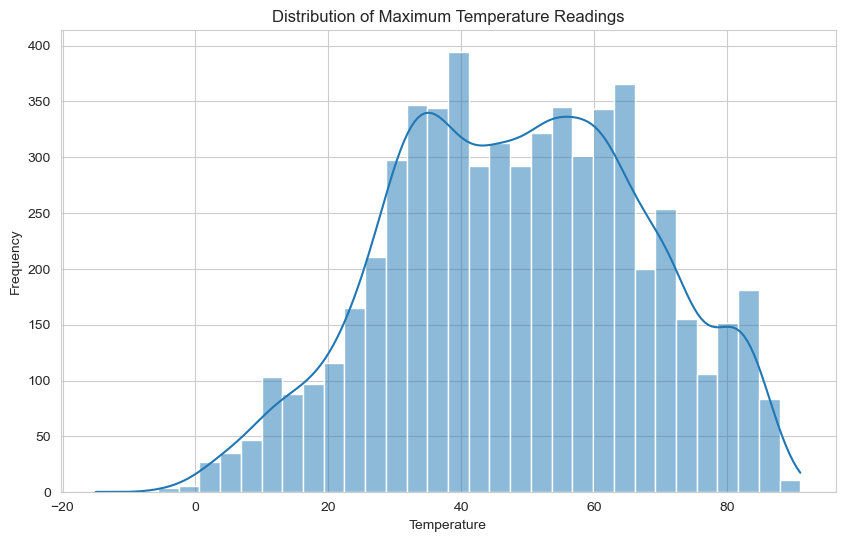

In [28]:
# Explore geographical coverage
if 'station' in noaa_df.columns:
    print("\nNumber of Unique Weather Stations:")
    print(len(noaa_df['station'].unique()))
    
    # Try to extract state codes from station IDs (if applicable)
    # This is a placeholder - you'll need to adjust based on your actual data format
    if noaa_df['station'].str.contains(':').any():
        # Example pattern - adjust as needed for your data
        noaa_df['state_code'] = noaa_df['station'].str.extract(r':([A-Z]{2})')
        print("\nState Coverage in NOAA Data:")
        print(noaa_df['state_code'].value_counts())

# Visualize temperature distribution (if TMAX data exists)
if 'datatype' in noaa_df.columns and 'value' in noaa_df.columns:
    if 'TMAX' in noaa_df['datatype'].values:
        plt.figure(figsize=(10, 6))
        temp_data = noaa_df[noaa_df['datatype'] == 'TMAX']
        sns.histplot(temp_data['value'], kde=True)
        plt.title('Distribution of Maximum Temperature Readings')
        plt.xlabel('Temperature')
        plt.ylabel('Frequency')
        plt.show()

In [45]:
# Function to clean and preprocess NOAA data
def clean_noaa_data(df):
    # Create a copy to avoid modifying the original
    df_clean = df.copy()
    
    # Convert date to datetime
    if 'date' in df_clean.columns and df_clean['date'].dtype != 'datetime64[ns]':
        df_clean['date'] = pd.to_datetime(df_clean['date'])
    
    # Extract year and month for easier aggregation
    df_clean['year'] = df_clean['date'].dt.year
    df_clean['month'] = df_clean['date'].dt.month
    
    # Extract state code from station ID (adjust pattern based on your data)
    if 'station' in df_clean.columns:
        # Example pattern - modify based on actual format
        df_clean['state_code'] = df_clean['station'].str.extract(r':([A-Z]{2})')
    
    # Handle missing values - fill or drop based on your strategy
    # For weather data, often dropping is appropriate as interpolation can be misleading
    print(f"Rows before cleaning: {len(df_clean)}")
    df_clean = df_clean.dropna(subset=['value'])  # Drop rows with missing values
    print(f"Rows after dropping missing values: {len(df_clean)}")
    
    # Filter for relevant data types if needed
    # Example: Focus on temperature and precipitation
    relevant_types = ['TMAX', 'TMIN', 'PRCP', 'SNOW']  # Adjust based on available types
    if 'datatype' in df_clean.columns:
        avail_types = df_clean['datatype'].unique()
        types_to_keep = [t for t in relevant_types if t in avail_types]
        if types_to_keep:
            df_clean = df_clean[df_clean['datatype'].isin(types_to_keep)]
            print(f"Filtered to data types: {types_to_keep}")
            print(f"Rows after filtering data types: {len(df_clean)}")
    
    # Check for and handle outliers
    # Example: For temperature data, remove physically impossible values
    if 'datatype' in df_clean.columns and 'value' in df_clean.columns:
        # For temperature data (simple example)
        temp_mask = df_clean['datatype'].isin(['TMAX', 'TMIN'])
        outliers = df_clean[temp_mask & ((df_clean['value'] < -100) | (df_clean['value'] > 150))]
        if len(outliers) > 0:

            print(f"Found {len(outliers)} temperature outliers")
            df_clean = df_clean[~df_clean.index.isin(outliers.index)]
            print(f"Rows after removing outliers: {len(df_clean)}")
    
    return df_clean

In [46]:
# Clean NOAA data
noaa_clean = clean_noaa_data(noaa_df)

# Verify cleaning results
print("\nCleaned NOAA Data Sample:")
display(noaa_clean.head())

# Check for any remaining missing values
print("\nMissing Values After Cleaning:")
print(noaa_clean.isnull().sum())

Rows before cleaning: 18000
Rows after dropping missing values: 18000
Filtered to data types: ['TMAX', 'TMIN', 'PRCP']
Rows after filtering data types: 18000

Cleaned NOAA Data Sample:


,date,datatype,station,attributes,value,year,state_code,month
0,2018-01-01,TMAX,GHCND:AQW00061705,",,W,2400",89.0,2018,AQ,1
1,2018-01-01,TMAX,GHCND:CA001018611,",,C,",40.0,2018,CA,1
2,2018-01-01,TMAX,GHCND:CA001135126,",,C,",21.0,2018,CA,1
3,2018-01-01,TMAX,GHCND:CA005020881,",,C,",0.0,2018,CA,1
4,2018-01-01,TMAX,GHCND:CA006020559,",,C,",2.0,2018,CA,1



Missing Values After Cleaning:
date          0
datatype      0
station       0
attributes    0
value         0
year          0
state_code    0
month         0
dtype: int64


In [53]:
# Function to integrate all three datasets
def integrate_datasets(noaa_df, market_df, fema_df):
    """
    Integrate the three datasets based on state and time periods.
    Returns an integrated dataframe for risk assessment.
    """
    print("Starting dataset integration...")
    
    # Make sure we have our key columns
    required_noaa_cols = ['year', 'month', 'state_code', 'datatype', 'value']
    required_market_cols = ['year', 'month', 'state', 'median_sale_price']
    required_fema_cols = ['year', 'month', 'state', 'incidentType']
    
    noaa_cols_exist = all(col in noaa_df.columns for col in required_noaa_cols)
    market_cols_exist = all(col in market_df.columns for col in required_market_cols)
    fema_cols_exist = all(col in fema_df.columns for col in required_fema_cols)
    
    if not all([noaa_cols_exist, market_cols_exist, fema_cols_exist]):
        print("Missing required columns in one or more datasets")
        print(f"NOAA columns exist: {noaa_cols_exist}")
        print(f"Market columns exist: {market_cols_exist}")
        print(f"FEMA columns exist: {fema_cols_exist}")
        return None
    
    # Step 1: Create state code mapping if needed
    # If market_df only has state names but not codes
    if 'state_code' not in market_df.columns and 'state' in market_df.columns:
        # Create a mapping dictionary (adjust based on your data)
        state_mapping = {
            'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
            'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
            'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
            'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
            'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
            'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
            'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
            'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
            'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
            'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
            'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
            'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
            'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
        }
        
        # Add state_code column
        market_df['state_code'] = market_df['state'].map(state_mapping)
        print(f"Added state codes to market data. Missing codes: {market_df['state_code'].isna().sum()}")
    
    # Step 2: Aggregate NOAA data by state, year, month, and data type
    print("Aggregating NOAA data...")
    
    # Pivot to get one column per weather data type
    noaa_pivot = noaa_df.pivot_table(
        index=['state_code', 'year', 'month'],
        columns='datatype',
        values='value',
        aggfunc=['mean', 'max', 'min', 'std']
    )
    
    # Flatten the multi-level columns
    noaa_pivot.columns = ['_'.join(col).strip() for col in noaa_pivot.columns.values]
    noaa_pivot = noaa_pivot.reset_index()
    
    print(f"NOAA pivot shape: {noaa_pivot.shape}")
    print("NOAA pivot columns:", noaa_pivot.columns.tolist())
    
    # Step 3: Aggregate FEMA data to count disasters by state, year, month
    print("Aggregating FEMA data...")
    
    # Count incidents by type
    fema_counts = fema_df.groupby(['state', 'year', 'month'])['incidentType'].value_counts().unstack(fill_value=0)
    fema_counts = fema_counts.reset_index()
    
    # Also add total incidents column
    incident_columns = [col for col in fema_counts.columns if col not in ['state', 'year', 'month']]
    fema_counts['total_incidents'] = fema_counts[incident_columns].sum(axis=1)
    
    print(f"FEMA counts shape: {fema_counts.shape}")
    print("FEMA counts columns:", fema_counts.columns.tolist())
    
    # Step 4: Use market data as the base and join other datasets
    print("Joining datasets...")
    
    # Start with market data
    result = market_df.copy()
    
    # Join with NOAA data
    result = result.merge(
        noaa_pivot,
        left_on=['state_code', 'year', 'month'],
        right_on=['state_code', 'year', 'month'],
        how='left'
    )
    
    # Join with FEMA data
    result = result.merge(
        fema_counts,
        left_on=['state', 'year', 'month'],
        right_on=['state', 'year', 'month'],
        how='left'
    )
    
    # Fill NaN values in disaster counts with zeros
    disaster_cols = [col for col in result.columns if col in incident_columns or col == 'total_incidents']
    result[disaster_cols] = result[disaster_cols].fillna(0)
    
    print(f"Final integrated dataset shape: {result.shape}")
    print("Missing values in integrated dataset:")
    missing = result.isnull().sum()
    print(missing[missing > 0].head())
    
    return result

# Integrate the cleaned datasets
integrated_data = integrate_datasets(noaa_clean, market_clean, fema_clean)

# Show the integrated dataset
print("\nIntegrated Dataset Sample:")
display(integrated_data.head())

# Basic analysis of the integrated data
print("\nIntegrated Dataset Summary Statistics:")
display(integrated_data.describe())

# Save the integrated dataset for later use
integrated_data.to_csv('integrated_data.csv', index=False)
print("\nSaved integrated dataset to 'integrated_data.csv'")

Starting dataset integration...
Aggregating NOAA data...
NOAA pivot shape: (37, 15)
NOAA pivot columns: ['state_code', 'year', 'month', 'mean_PRCP', 'mean_TMAX', 'mean_TMIN', 'max_PRCP', 'max_TMAX', 'max_TMIN', 'min_PRCP', 'min_TMAX', 'min_TMIN', 'std_PRCP', 'std_TMAX', 'std_TMIN']
Aggregating FEMA data...
FEMA counts shape: (452, 19)
FEMA counts columns: ['state', 'year', 'month', 'Biological', 'Dam/Levee Break', 'Earthquake', 'Fire', 'Flood', 'Hurricane/Typhoon', 'Mud/Landslide', 'Other', 'Severe Ice Storm', 'Severe Storm', 'Snowstorm', 'Straight-Line Winds', 'Tornado', 'Tropical Storm', 'Winter Storm', 'total_incidents']
Joining datasets...
Final integrated dataset shape: (38560, 88)
Missing values in integrated dataset:
city                     38560
median_list_price          104
median_list_price_mom      167
median_list_price_yoy      185
median_ppsf                114
dtype: int64

Integrated Dataset Sample:


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,year,month,mean_PRCP,mean_TMAX,mean_TMIN,max_PRCP,max_TMAX,max_TMIN,min_PRCP,min_TMAX,min_TMIN,std_PRCP,std_TMAX,std_TMIN,Biological,Dam/Levee Break,Earthquake,Fire,Flood,Hurricane/Typhoon,Mud/Landslide,Other,Severe Ice Storm,Severe Storm,Snowstorm,Straight-Line Winds,Tornado,Tropical Storm,Winter Storm,total_incidents
0,2024-11-01,2024-11-30,30,state,4,41,f,Maine,NaN,Maine,ME,All Residential,-1,402500,-0.029789,0.081431,395100.0,-0.052429,0.053751,251.0,-0.039117,0.072357,256.0,-0.033297,0.095935,1501,-0.125801,0.034459,1524.0,-0.206250,0.121413,1330.0,-0.351220,0.078670,4546.0,-0.095863,0.383024,3.0,0.1,0.7,43.0,3.0,13.0,0.981415,-0.001156,-0.013116,0.306462,0.007103,-0.065006,0.202816,-0.076620,-0.053345,0.358067,-0.045096,-0.040771,Northeast Region,NaN,2025-01-13 14:16:48,2024,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-06-01,2020-06-30,30,state,4,42,f,Virginia,NaN,Virginia,VA,Single Family Residential,6,348300,0.019555,0.009276,328100.0,0.009550,0.091965,158.0,0.006747,0.015511,164.0,0.009004,0.073317,7096,0.245401,0.017535,12321.0,0.150098,0.185281,9998.0,0.090413,-0.047991,20971.0,-0.068701,-0.297266,2.0,-0.7,-0.9,49.0,5.0,4.0,0.990132,0.000836,0.003135,0.302528,-0.001363,0.038534,0.096800,-0.006761,-0.054530,0.374999,0.027568,0.122037,South Region,NaN,2025-01-13 14:16:48,2020,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-11-01,2018-11-30,30,state,4,43,f,Maryland,NaN,Maryland,MD,Townhouse,13,226100,0.016573,0.037703,248900.0,-0.087727,0.018036,139.0,-0.010134,-0.019633,146.0,-0.060069,-0.026089,2065,-0.039088,-0.060937,2253.0,-0.119922,-0.067081,2128.0,-0.208039,-0.073171,5864.0,-0.039004,-0.007783,2.8,0.0,0.1,43.0,1.0,8.0,0.996570,0.004887,-0.000281,0.236804,-0.013080,-0.007853,0.280866,-0.144404,0.014538,0.270132,-0.014779,0.124608,South Region,NaN,2025-01-13 14:16:48,2018,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-11-01,2017-11-30,30,state,4,25,f,Hawaii,NaN,Hawaii,HI,Townhouse,13,565300,-0.192445,0.095608,727700.0,0.244710,0.250023,431.0,-0.033145,0.195455,563.0,0.141473,0.153337,12,0.714286,-0.250000,14.0,-0.066667,-0.125000,19.0,1.111111,-0.321429,78.0,0.012987,-0.271028,6.5,-4.5,-0.2,136.0,-138.0,20.0,0.969509,0.001467,-0.021275,0.166667,0.166667,-0.020833,0.064103,-0.026807,0.008028,0.280702,0.280702,0.090442,West Region,NaN,2025-01-13 14:16:48,2017,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-01,2013-01-31,30,state,4,22,f,Ohio,NaN,Ohio,OH,Townhouse,13,157300,-0.361743,-0.311451,98900.0,0.191161,-0.011785,155.0,0.454939,1.480880,69.0,0.186674,0.009352,12,-0.142857,2.000000,12.0,-0.076923,2.000000,18.0,0.125000,-0.590909,137.0,-0.132911,-0.234637,11.4,0.1,-33.4,170.5,40.0,-112.0,0.959581,0.005619,0.015977,0.250000,0.178571,0.250000,0.000405,NaN,NaN,0.000000,0.0


Integrated Dataset Summary Statistics:


,period_begin,period_end,period_duration,region_type_id,table_id,city,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,last_updated,year,month,mean_PRCP,mean_TMAX,mean_TMIN,max_PRCP,max_TMAX,max_TMIN,min_PRCP,min_TMAX,min_TMIN,std_PRCP,std_TMAX,std_TMIN,Biological,Dam/Levee Break,Earthquake,Fire,Flood,Hurricane/Typhoon,Mud/Landslide,Other,Severe Ice Storm,Severe Storm,Snowstorm,Straight-Line Winds,Tornado,Tropical Storm,Winter Storm,total_incidents
count,38560,38560,38560.0,38560.0,38560.000000,0.0,38560.000000,38560.000000,38560.000000,38560.000000,3.845600e+04,38393.000000,38375.000000,38446.000000,38545.000000,38547.000000,38456.000000,38393.000000,38375.000000,38560.000000,38560.000000,38560.000000,38463.000000,38445.000000,38430.000000,38456.000000,38393.000000,38375.000000,38560.000000,38472.000000,38463.000000,38477.000000,38472.000000,38463.000000,38560.000000,38531.000000,38532.000000,37313.000000,37210.000000,37149.000000,38509.000000,38509.000000,38509.000000,38560.000000,29893.000000,28190.000000,38414.000000,38344.000000,38318.000000,0.0,38560,38560.000000,38560.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0,38560.0
mean,2018-07-12 21:31:10.954356992,2018-08-11 08:09:48.547717632,30.0,4.0,26.044813,NaN,4.855939,262596.250000,0.021104,0.089087,3.021226e+05,0.008335,0.066341,171.102273,0.049373,0.116112,178.902642,0.008791,0.065642,1843.961022,0.035588,0.090050,2893.081611,0.032945,0.112045,3085.619773,0.050406,0.072123,5972.954525,-0.001142,-0.003780,4.023999,-0.033198,-0.374352,68.411346,-0.585165,-6.661087,0.975322,0.000234,0.002832,0.209165,0.000230,0.008847,0.144843,0.000958,0.012409,0.252183,0.001420,0.026464,NaN,2025-01-13 14:16:48,2018.070980,6.512189,0.010000,23.666667,9.416667,0.028333,44.500000,37.000000,0.0,9.333333,-10.500000,0.013545,16.242892,21.363352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2012-01-01 00:00:00,2012-01-31 00:00:00,30.0,4.0,1.000000,NaN,-1.000000,7000.000000,-0.913000,-0.941347,5.300000e+04,-0.743884,-0.725075,3.000000,-0.997401,-0.997604,27.000000,-0.955300,-0.949075,1.000000,-0.900000,-0.979592,1.000000,-0.909091,-0.980392,1.000000,-0.947368,-0.979167,1.000000,-0.850000,-0.965714,0.000000,-108.300000,-116.500000,0.000000,-2627.000000,-3871.000000,0.500000,-0.563254,-0.500281,0.000000,-1.000000,-1.000000,0.000009,-0.888889,-0.800000,0.000000,-1.000000,-1.000000,NaN,2025-01-13 14:16:48,2012.000000,1.000000,0.000000,5.000000,-14.500000,0.000000,37.000000,24.000000,0.0,-15.000000,-38.000000,0.000000,11.518102,10.099505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2015-05-01 00:00:00,2015-05-31 00:00:00,30.0,4.0,13.000000,NaN,3.000000,167800.000000,-0.029903,0.014512,1.993000e+05,-0.027470,0.024706,100.000000,-0.021982,0.015503,113.000000,-0.016521,0.024244,76.000000,-0.117647,-0.081633,81.000000,-0.111574,-0.083931,92.000000,-0.142857,-0.083763,266.000000,-0.046342,-0.151007,2.300000,-0.500000,-1.000000,38.000000,-7.000000,-15.000000,0.962868,-0.003737,-0.003646,0.114286,-0.019774,-0.022708,0.087307,-0.017902,-0.016954,


Saved integrated dataset to 'integrated_data.csv'
